In [1]:
import sys; sys.path.append('..')
import warnings; warnings.simplefilter("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
user_df = pd.read_csv('../data/Users.csv')

In [3]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
user_df.rename(columns={"User-ID": "user_id", "Age": "age" }, inplace=True)

In [5]:
user_df = pd.concat([user_df, user_df["Location"].str.split(', ', expand=True)], axis=1)
drop_cols = ["Location", 3,4,5,6,7,8]
user_df = user_df.drop(drop_cols, axis=1)
user_df = user_df.rename(columns={0: "city", 1: "state", 2: "country"})
user_df.head()

,user_id,age,city,state,country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [6]:
import joblib
joblib.dump(user_df, filename="../data/user.pkl")

['../data/user.pkl']

<AxesSubplot:>

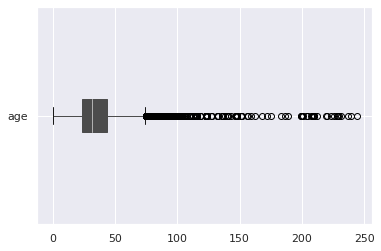

In [8]:
user_df.boxplot(column="age", vert=False, patch_artist=True)

In [9]:
# 年齢がえらいことになっている。登録時の打ち間違え？
import numpy as np

len_user = len(user_df)
len_user_over_100 =  len(user_df[user_df["age"] > 100])
len_user_age_is_nan = user_df["age"].isnull().sum()

print(f"ユーザの数:　　{len_user}")
print(f'100歳以上のレコード数: {len_user_over_100}')

print(f'AgeがNanのレコード数: {len_user_age_is_nan}')
print(f'正しくAgeが入力されているとされるレコードの割合: {(len_user-(len_user_over_100+len_user_age_is_nan))/len_user:.2f}')


ユーザの数:　　278858
100歳以上のレコード数: 366
AgeがNanのレコード数: 110762
正しくAgeが入力されているとされるレコードの割合: 0.60


In [10]:
# 国ごとのユーザ数
user_df.groupby("country").agg({"user_id": np.sum})

,user_id
country,
,440721
australia,275708
england,227693
pasig city.,261732
&#20013;&#22269;,272827
...,...
zhengjiang,23884
zimbabwe,3481123
álava,23325


In [8]:
len_state_nan = len(user_df[user_df["state"]== "n/a"])
len_city_nan = len(user_df[user_df["city"]== "n/a"])
len_country_nan = len(user_df[user_df["country"]== "n/a"])

print(f"欠損値の数")
print(f'state: {len_state_nan}')
print(f'city: {len_city_nan}')
print(f'country: {len_country_nan}')

欠損値の数
state: 12421
city: 439
country: 78


In [9]:
# stateがわかっていてcountryがわからない場合などは場合によって欠損値を埋めれる??
temp_df = user_df[~((user_df["city"]=="n/a") & (user_df["state"]=="n/a"))]
city_state_country = len(temp_df[temp_df["country"]=="n/a"])

# cityはわかるがstateがわからない場合
city_state = len(user_df[(user_df["city"]!="n/a") & (user_df["state"]=="n/a")])

# すべてがわからない
temp_df = user_df[(user_df["city"]=="n/a") & (user_df["state"]=="n/a")]
all_na = len(temp_df[temp_df["country"]=="n/a"])

# stateはnew yorkなのにcountryはusaではないレコードが存在するから、countryだけを考慮すればいいかな
error_recode = len(user_df[(user_df["state"]=="new york") & (user_df["country"]!="usa")])

print(f"cityはわかるがstateがわからないレコード数: {city_state}")
print(f'cityまたは、stateがわかっていてcountryがわからないレコード数: {city_state_country}')
print(f'すべてがわからないレコード数: {all_na}')
print(f'stateはnew yorkなのにcountryはusaではないレコード数: {error_recode}')

cityはわかるがstateがわからないレコード数: 12150
cityまたは、stateがわかっていてcountryがわからないレコード数: 67
すべてがわからないレコード数: 11
stateはnew yorkなのにcountryはusaではないレコード数: 82
